<span style="font-size: 40px;">
PEC 2 - Ridgeline Chart
</span>

Vamos a trabajar con los datos del dataset: https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities

Leemos el archivo .csv con los datos de las temperaturas de las ciudades.
Vamos a trabajar exclusivamente con los datos de la ciudad de Barcelona durante el año 2010.

In [1]:
# !pip install joypy

In [2]:
import pandas as pd
import calendar
from joypy import joyplot
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

In [3]:
df = pd.read_csv("city_temperature.csv", low_memory=False)
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [4]:
# Nos quedamos con los datos de Barcelona en el año 2010:
bcn = df[df['City'] == 'Barcelona']
bcn = bcn[(bcn['Year'] == 2010)]

Pasamos la temperatura media de grados Fahrenheit a Celsius:

In [5]:
bcn["AvgTemperature"] = (bcn["AvgTemperature"]-32) * 5/9

In [6]:
bcn

,Region,Country,State,City,Month,Day,Year,AvgTemperature
908920,Europe,Spain,NaN,Barcelona,1,1,2010,11.555556
908921,Europe,Spain,NaN,Barcelona,1,2,2010,9.833333
908922,Europe,Spain,NaN,Barcelona,1,3,2010,10.444444
908923,Europe,Spain,NaN,Barcelona,1,4,2010,10.111111
908924,Europe,Spain,NaN,Barcelona,1,5,2010,10.388889
...,...,...,...,...,...,...,...,...
909280,Europe,Spain,NaN,Barcelona,12,27,2010,5.166667
909281,Europe,Spain,NaN,Barcelona,12,28,2010,6.777778
909282,Europe,Spain,NaN,Barcelona,12,29,2010,8.833333
909283,Europe,Spain,NaN,Barcelona,12,30,2010,11.277778


In [7]:
# Transformamos los números de mes a su nombre correspondiente:
bcn["Month"] = bcn["Month"].apply(lambda x: calendar.month_name[x])

# Ordenamos los nombres en el orden natural del año:
unique_months = bcn['Month'].unique()
cat_month = CategoricalDtype(unique_months)
bcn['Month'] = bcn['Month'].astype(cat_month)

<span style="font-size: 18px;">Creamos un Ridgeline Plot:</span>

<Figure size 640x480 with 0 Axes>

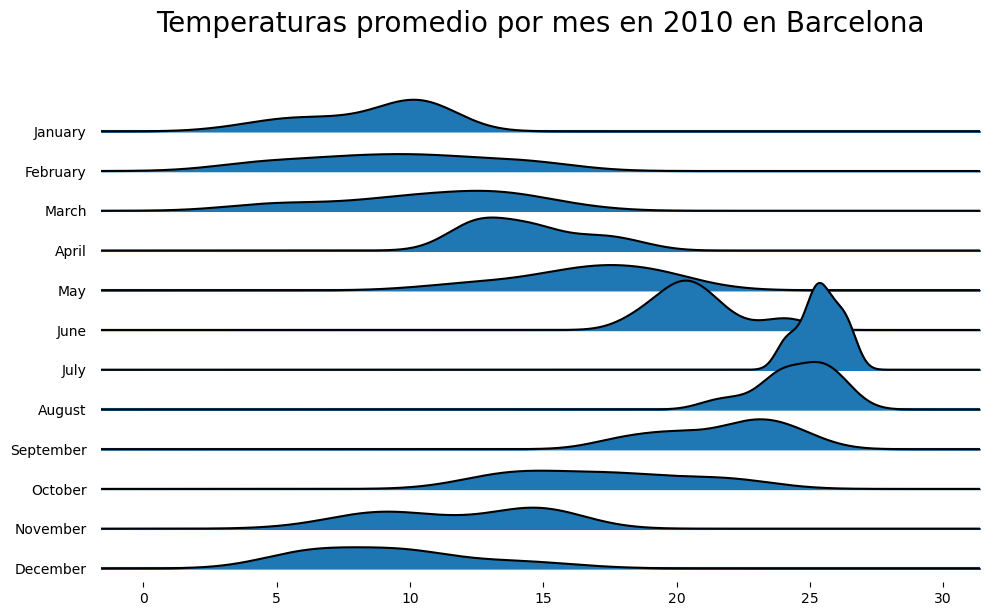

In [10]:
plt.figure()

joyplot(
    data=bcn[['AvgTemperature', 'Month']], 
    by='Month',
    figsize=(10, 6)
)
plt.title('Temperaturas promedio por mes en 2010 en Barcelona', fontsize=20)
plt.show()